In [1]:
print("titanic-survival-prediction")

titanic-survival-prediction


In [28]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Loading Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [12]:
train.shape

(891, 12)

In [13]:
test.shape

(418, 11)

In [14]:
#checking null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [18]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [19]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

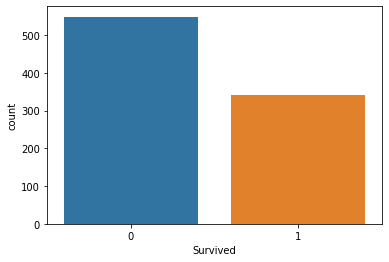

In [30]:
sns.countplot(data=train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

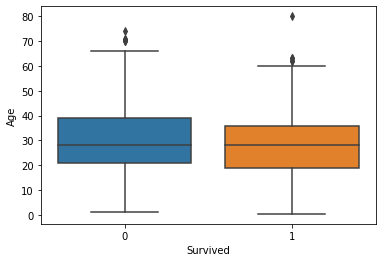

In [32]:
sns.boxplot(data=train_df, x='Survived', y='Age')

In [36]:
train["Age"].fillna(train["Age"].mean(), inplace = True)

In [37]:
train['Sex']=train['Sex'].replace('male', 0)
train['Sex']=train['Sex'].replace('female', 1)

In [38]:
train.drop(['Name', 'PassengerId', 'Fare', 'Ticket','Embarked', 'Cabin'], axis = 1, inplace = True)

In [39]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [41]:
#defining features

X= train.drop('Survived', axis=1)
y= train['Survived']

In [43]:
#splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [45]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

logistic_model= LogisticRegression()
logistic_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [47]:
logistic_model.coef_

array([[-0.93907697,  1.30757216, -0.47770544, -0.32733646, -0.0530102 ]])

In [48]:
y_pred= logistic_model.predict(scaled_X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

accuracy_score(y_test, y_pred)

0.7761194029850746

In [50]:
confusion_matrix(y_test, y_pred)

array([[133,  21],
       [ 39,  75]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       154
           1       0.78      0.66      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [67]:
logistic_model.intercept_

array([2.1845192])

In [68]:
logistic_model.predict_proba(X_test)

array([[0.6521825 , 0.3478175 ],
       [0.06020228, 0.93979772],
       [0.47989841, 0.52010159],
       [0.80746024, 0.19253976],
       [0.76003363, 0.23996637],
       [0.93856596, 0.06143404],
       [0.5096609 , 0.4903391 ],
       [0.87863827, 0.12136173],
       [0.09020664, 0.90979336],
       [0.47934089, 0.52065911],
       [0.76003363, 0.23996637],
       [0.91317186, 0.08682814],
       [0.33780102, 0.66219898],
       [0.88637905, 0.11362095],
       [0.87178804, 0.12821196],
       [0.93448285, 0.06551715],
       [0.47515173, 0.52484827],
       [0.85728244, 0.14271756],
       [0.90611362, 0.09388638],
       [0.1926388 , 0.8073612 ],
       [0.92165234, 0.07834766],
       [0.93811794, 0.06188206],
       [0.4102128 , 0.5897872 ],
       [0.47934089, 0.52065911],
       [0.94848959, 0.05151041],
       [0.76315771, 0.23684229],
       [0.85265275, 0.14734725],
       [0.80331784, 0.19668216],
       [0.8933513 , 0.1066487 ],
       [0.93832176, 0.06167824],
       [0.

In [70]:
X_test

,Pclass,Sex,Age,SibSp,Parch
331,1,0,45.500000,0,0
700,1,1,18.000000,1,0
748,1,0,19.000000,1,0
751,3,0,6.000000,0,1
481,2,0,29.699118,0,0
...,...,...,...,...,...
388,3,0,29.699118,0,0
416,2,1,34.000000,1,1
407,2,0,3.000000,1,1
482,3,0,50.000000,0,0


In [71]:
logistic_model.score(X_train,y_train)

0.8170144462279294

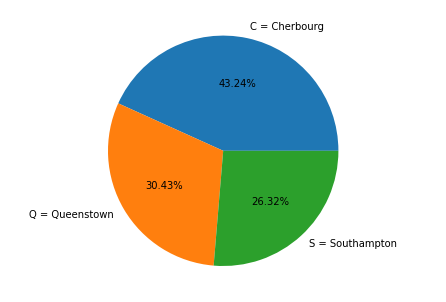

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


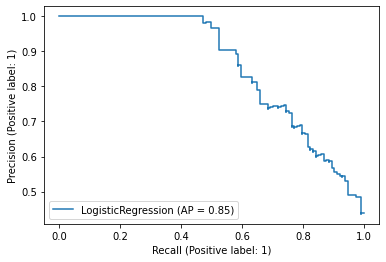

In [53]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

plot_precision_recall_curve(logistic_model, scaled_X_test, y_test)

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


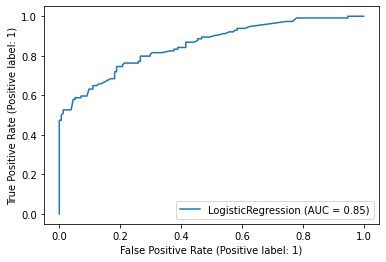

In [54]:
plot_roc_curve(logistic_model, scaled_X_test, y_test)